#Mini Project 1 - Regression and Logisitic Regression Classification

Richard Acs -
Z23536011 -
1/26/2024

This mini project focuses on exploring regression and logistic regression. The first part of this assignment uses regression to fit lines of different polynomial degrees to a simple numerical dataset. Trends in underfitting and overfitting and mean squared error as the complexity increases are investigated. The second part of this assignment uses logistic regression to create a binary classifier for a simple numerical dataset with two features. Each part of the assignment visualizes the regression/classification function that was fit to the data to show how the shape of the function is being fit to the data.


##Part 1 - Regression


The first part of this assignment uses the theory of regression to fit a line, 2nd degree polynomial, and 6th degree polynomial to the data. Additionally, a graph plotting the cost function as a function of the polynomial order (from 1 to 10) is used to analyze when overfitting starts to occur with increasing complexity.

---




**Dependencies**

This section contains all dependencies used for the rest of the code cells.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d
from IPython.display import Math

**Data Preparation**

The code cell below creates two numpy arrays for the input data (x) and the expected output (d).

In [ ]:
#Data Preparation
dtemp = [6.0532, 7.3837, 10.0891, 11.0829, 13.2337, 12.6710, 12.7972, 11.6371]
xtemp = [1, 1.7143, 2.4286, 3.1429, 3.8571, 4.5714, 5.4857, 6]

#Creates expected output matrix of size 8x1
d = np.ones((8,1))
d[:,0] = dtemp
d = np.array(d, dtype='float')

#Creates expected output matrix of size 8x11
#The matrix is structured as x^10, x^9, x^8,...,x^1, 1 for each row
#This is used to create the x matrix depending on the degree polynomial being fitted
x = np.ones((8,11))
for j in range(10):
  x[:,j] = xtemp
  for i in range(8):
    x[i, j] = x[i, j]**(10-j)

x = np.array(x, dtype='float')

**Functions**

The code cells below contain the functions used to fit each regression line/polynomial to the data.

The function degree_polynomial below is used to create the required input matrix x depending on the specified polynomial degree that we will be fitting to the data.

In [ ]:
def degree_polynomial(x, degree):
  new_x = []
  for i in range(len(x)):
    new_x.append(x[i][10-degree:11])
  return new_x

The function plot_best_fit_line below plots the best fit line/polynomial as well as the original data points given the best coefficients, the original x array, and the original d array.

In [ ]:
def plot_best_fit_line(coef, xtemp, dtemp, degree):
  # Creating vectors X and Y
  coeffi = np.zeros((11,1))
  for i in range(len(coef)):
    coeffi[10-i] = coef[len(coef)-1-i]

  X = np.linspace(0, 6.5, 1000)
  y = (coeffi[0] * (X**10)) + (coeffi[1] * (X**9)) + (coeffi[2] * (X**8)) + (coeffi[3] * (X**7)) + (coeffi[4] * (X**6)) + (coeffi[5] * (X**5)) + (coeffi[6] * (X**4)) + (coeffi[7] * (X**3)) + (coeffi[8] * (X**2)) + (coeffi[9] * X) + coeffi[10]

  fig = plt.figure(figsize = (10, 5))
  # Create the plot
  plt.plot(X, y)
  plt.plot(xtemp, dtemp, 'o')
  plt.title(str(degree) + ' Degree Polynomial of Best Fit ')

  # Show the plot
  plt.show()


 The function fit_regression below is the main driver function that takes the x matrix, d matrix, a parameter for what degree polynomial you want to fit, the original x array and d array for plotting, and a binary parameter if you want to plot the best fit polynomial. This function returns the best fit coefficients and the MSE, as well as graphs the best fit line if the showplot parameter is true.

In [ ]:
def fit_regression(x_original, d, degree, xtemp, dtemp, showplot):
  x = degree_polynomial(x_original, degree)
  coefficients = np.dot(np.linalg.pinv(x), d)
  #coefficients = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(x), x)), np.transpose(x)), d)

  if showplot:
    plot_best_fit_line(coefficients, xtemp, dtemp, degree)
    print()

  error = np.dot(x, coefficients) - d
  MSE = 0.5*(np.dot(np.transpose(error), error))/8
  print('MSE for polynomial of degree ', degree, ': ', MSE[0][0])

  return coefficients, MSE

###PART A

Fit a line to the data, and measure the cost function defined as
the mean of squared errors. Plot your data points and the line that models the system’s function.


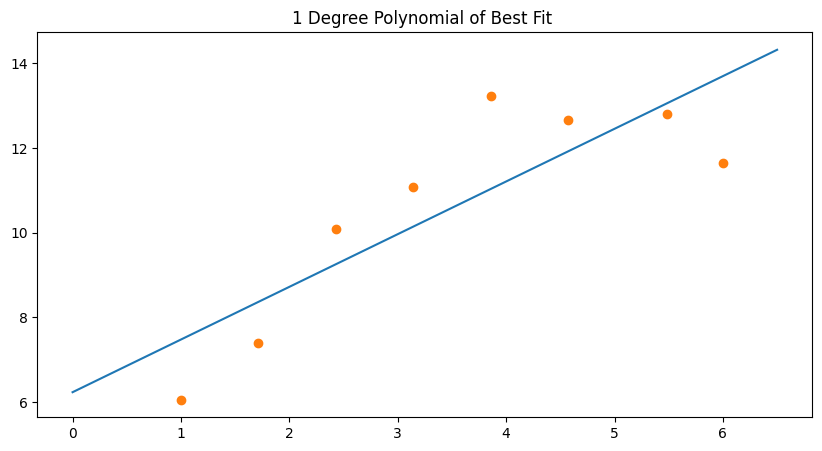


MSE for polynomial of degree  1 :  0.8936361286123732


In [ ]:
coefficients, MSE = fit_regression(x, d, 1, xtemp, dtemp, 1)

In [ ]:
print('The equation for the line of best fit is: y =', coefficients[0][0], 'x +', coefficients[1][0])

The equation for the line of best fit is: y = 1.2443510770486852 x + 6.232149953403386


###PART B

Use the same data but this time fit a second order polynomial to these data points. What’s the value of your cost function? Plot the second order curve.

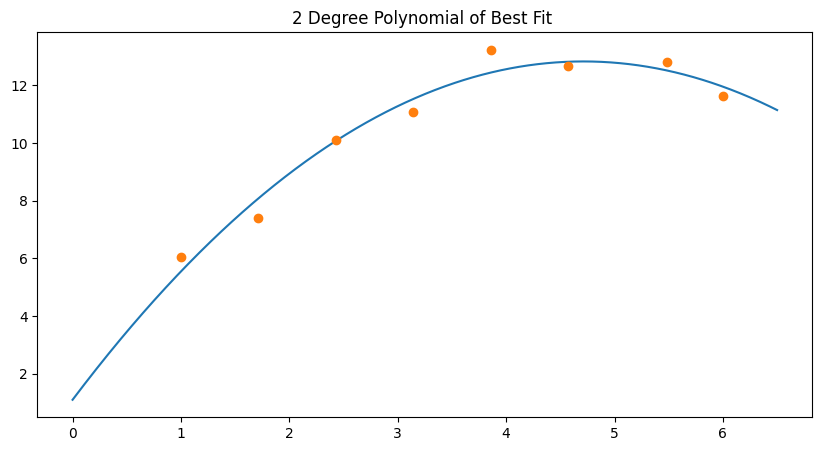


MSE for polynomial of degree  2 :  0.11042403526562504


In [ ]:
coefficients, MSE = fit_regression(x, d, 2, xtemp, dtemp, 1)

In [ ]:
print('The equation for the polynomial of best fit is: y =', coefficients[0][0], 'x^2 +', coefficients[1][0], 'x +', coefficients[2][0])

The equation for the polynomial of best fit is: y = -0.5283707306845958 x^2 + 4.980611737367235 x + 1.0919147617785336


###PART C

Increase the order of the polynomial to 6 and fit the curve. How much error do you measure this time? Plot the 6th order curve.

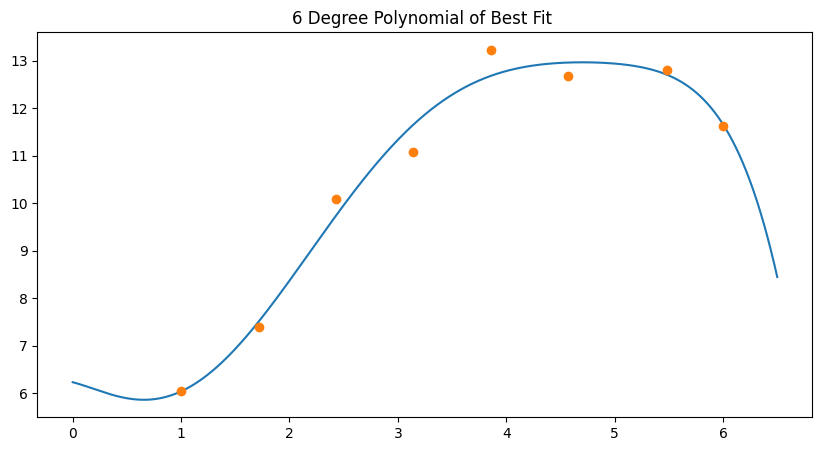


MSE for polynomial of degree  6 :  0.054002293505054214


In [ ]:
coefficients, MSE = fit_regression(x, d, 6, xtemp, dtemp, 1)

In [ ]:
print('The equation for the polynomial of best fit is:')
print('y =', coefficients[0][0], 'x^6 +', coefficients[1][0], 'x^5 +', coefficients[2][0], 'x^4 +', coefficients[3][0], 'x^3 +', coefficients[4][0], 'x^2 +', coefficients[5][0], 'x +', coefficients[6][0])

The equation for the polynomial of best fit is:
y = -0.007475828973460774 x^6 + 0.13410632264129552 x^5 + -0.8659540116555746 x^4 + 2.2005262212315557 x^3 + -1.0565078199249172 x^2 + -0.5981815539525996 x + 6.229582334613859


###PART D

Remove one data point (d: 12.7772, x: 5.2857) from your set. Once again fit the 6th order
polynomial. After finding the polynomial bring that data point back and once again measure
the cost function for all data points. Plot the new 6th order curve.


In [ ]:
#Create new dataset without point (d: 12.7772, x: 5.2857)

dtemp_2 = [6.0532, 7.3837, 10.0891, 11.0829, 13.2337, 12.6710, 11.6371]
xtemp_2 = [1, 1.7143, 2.4286, 3.1429, 3.8571, 4.5714, 6]

d_2 = np.ones((7,1))
d_2[:,0] = dtemp_2
d_2 = np.array(d_2, dtype='float')

x_2 = np.ones((7,11))
for j in range(10):
  x_2[:,j] = xtemp_2
  for i in range(7):
    x_2[i, j] = x_2[i, j]**(10-j)

x_2 = np.array(x_2, dtype='float')

In [ ]:
#Fit a 6th order polynomial to the new datset with one datapoint missing and show the new MSE
coefficients, MSE = fit_regression(x_2, d_2, 6, xtemp_2, dtemp_2, 0)

MSE for polynomial of degree  6 :  1.196396154312511e-22


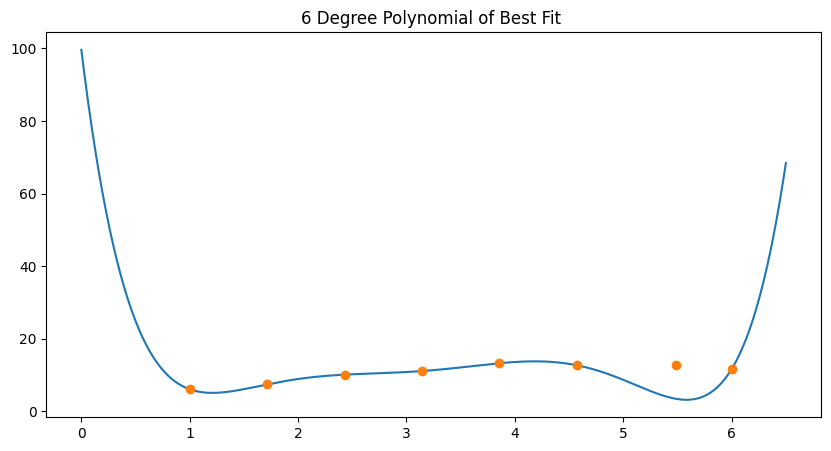


Full dataset MSE for polynomial of degree 6 fit on dataset with a missing point:  5.482920327291571


In [ ]:
#Plot the new 6th order polynomial after bringing back the missing point
plot_best_fit_line(coefficients, xtemp, dtemp, 6)

#Calculate the MSE of the 6th order polynomial after bringing back the missing point
x_3 = degree_polynomial(x, 6)
error = np.dot(x_3, coefficients) - d
MSE = 0.5*(np.dot(np.transpose(error), error))/8

print('\nFull dataset MSE for polynomial of degree 6 fit on dataset with a missing point: ', MSE[0][0])

**How much the value of the cost function changed
compared to the 6th order polynomial where all data points were used for curve fitting? Is
the 6th order polynomial a case of over fitting?**

The mean squared error of the 6th order polynomial increased significantly to around 5.48 after fitting the line to the dataset with one point missing and then calculating the error for the full dataset with the point back. The error was around 0.054 for the 6th degree polynomial fitted to the full dataset, which is significantly lower than 5.48. This indicates that the 6th order polynomial is overfitting to the data, since introducing 1 datapoint that it was not trained on made the error increase significantly. A polynomial that did not overfit would have a similar MSE even when tested on points it was not trained on since it captured the general trend of the data instead of the very specific characteristics. The overfitting is also shown in the graph, with the added datapoint not being well represented by the curve since the curve overfit to the training data which the datapoint was removed from.

###PART E

Plot the value of the cost function as a function of the polynomial order (from 1 to 10) using all data points.

In [ ]:
#Calculate the MSE for best fit polynomials of order 0 to 10
MSE_array = []
for i in range(0, 11):
  coeff, MSE = fit_regression(x, d, i, xtemp, dtemp, 0)
  MSE_array.append(MSE[0][0])

MSE for polynomial of degree  0 :  3.0398833617968752
MSE for polynomial of degree  1 :  0.8936361286123732
MSE for polynomial of degree  2 :  0.11042403526562504
MSE for polynomial of degree  3 :  0.0700621621739994
MSE for polynomial of degree  4 :  0.06165159209607538
MSE for polynomial of degree  5 :  0.05463949947143589
MSE for polynomial of degree  6 :  0.054002293505054214
MSE for polynomial of degree  7 :  1.0052552977151758e-20
MSE for polynomial of degree  8 :  9.302623784527056e-19
MSE for polynomial of degree  9 :  4.553594196002051e-17
MSE for polynomial of degree  10 :  1.7377321531520434e-17


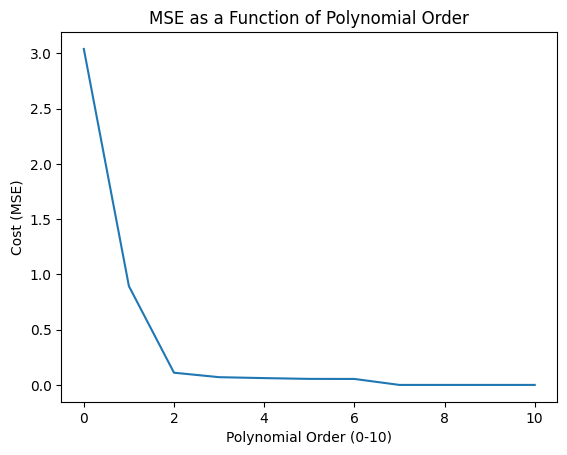

In [ ]:
#Plot MSE as a function of the polynomial order
plt.plot(MSE_array)
plt.xlabel("Polynomial Order (0-10)")
plt.ylabel("Cost (MSE)")
plt.title("MSE as a Function of Polynomial Order")
plt.show()

**Based on this curve, which order is suitable for this dataset to avoid over or under fitting?**

Based on the curve, I would expect that a polynomial of 2nd degree would be most suitable for the dataset to avoid over or under fitting. This is because any polynomial of a smaller order (1st degree or 0 degree) had a significantly higher cost, indicating that it underfit and could improve in its fit to the data. However, any order polynomial after 2nd degree had a very minor reduction in MSE, indicating that the general trend in the data was already captured well enough by the 2nd degree polynomial and anything after was just overfitting to the specific yet unimportant characteristics of the training data which would not be representative of new test data. This is further confirmed by the previous graphs which showed that a 2nd degree polynomial captured the overall trend well, yet a higher degree such as the 6th degree polynomial began to overfit and pass through as many points as possible while introducing odd function shapes.  


##Part 2 - Logistic Regression Classification

The second part of this assignment uses logistic regression to create a binary classifier for a simple numerical dataset with two features and plots the resulting 3-dimensional decision boundary. Part A utilizes a first order decision curve, while part B utilizes a second order decision curve, and we then compare the performance of the two models.


---



###PART A
Use the logistic regression algorithm to design a supervised classifier that can perfectly separate these two sets. Plot these data points and your decision line.

In [ ]:
#Data Preparation
x1temp = [0.5, 0.8, 0.9, 1.0, 1.1, 2.0, 2.2, 2.5, 2.8, 3.0];
x2temp = [0.5, 0.2, 0.9, 0.8, 0.3, 2.5, 3.5, 1.8, 2.1, 3.2];
dtemp = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0 ];

d = np.ones((10,1))
d[:,0] = dtemp
d = np.array(d, dtype='float')

x1 = np.ones((10,3))
x1[:,0] = x1temp
x1[:,1] = x2temp
x1 = np.array(x1, dtype='float')

alpha = 0.1
weights = np.zeros((3,1))

In [ ]:
#Steepest (Gradient) Decent
for i in range(100000):           #For 100,000 iterations
  for j in range(len(weights)):   #Iterate through each datapoint
    sum = 0
    #Steepest decent update equation
    for i in range(len(x1)):
      input = np.dot(x1[i], weights)
      sum = sum + x1[i][j] * ((d[i] - (1/(1 + math.exp(-input)))))
    weights[j] = weights[j] + (alpha/2) * sum

In [ ]:
#Displays general form of logistic function
Math(r'z=\frac{1}{1+e^{-\left(w_{2}x_{1}+w_{1}x_{2}+w_{0}\right)}}')

<IPython.core.display.Math object>

In [ ]:
#Final Parameters
print('Where the final parameters are:')
print('w2 = ', weights[0][0])
print('w1 = ', weights[1][0])
print('w0 = ', weights[2][0])

Where the final parameters are:
w2 =  6.380881611152793
w1 =  6.189856976536074
w0 =  -19.06928390626894


In [ ]:
#Prepare 3D points for surface boundary
X_points = np.linspace(0, 4, 100)
Y_points = np.linspace(0, 4, 100)
X = []; Y = []; Z = []

for i in X_points:
  for j in Y_points:
    X.append(i)
    Y.append(j)
    Z.append(1/(1+ math.exp(-(weights[0] *(i) + weights[1] * (j) + weights[2]))))

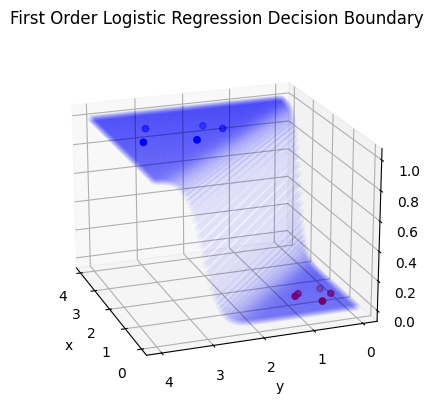

In [ ]:
#Plot the 3D surface boundary
fig = plt.figure()
plot3d = plt.axes(projection='3d')

plot3d.scatter3D(X, Y, Z, c='b', alpha=0.02)
plot3d.set_xlabel('x')
plot3d.set_ylabel('y')
plot3d.set_zlabel('z')
plt.title('First Order Logistic Regression Decision Boundary')

zdata = [0.0, 0.0, 0.0, 0.0, 0.0]
xdata = [0.5, 0.8, 0.9, 1.0, 1.1]
ydata = [0.5, 0.2, 0.9, 0.8, 0.3]
plot3d.scatter3D(xdata, ydata, zdata, c='r')

zdata = [1.0, 1.0, 1.0, 1.0, 1.0]
xdata = [2.0, 2.2, 2.5, 2.8, 3.0]
ydata = [2.5, 3.5, 1.8, 2.1, 3.2]
plot3d.scatter3D(xdata, ydata, zdata, c='b')

plot3d.view_init(20, 160, 0)

###PART B
Increase the order of the decision making curve to 2 and once again use the logistic regression to design the classifier. How do you compare these two classifiers?



In [ ]:
#Data Preparation
x1temp = [0.5, 0.8, 0.9, 1.0, 1.1, 2.0, 2.2, 2.5, 2.8, 3.0];
x2temp = [0.5, 0.2, 0.9, 0.8, 0.3, 2.5, 3.5, 1.8, 2.1, 3.2];
dtemp = [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0 ];

d = np.ones((10,1))
d[:,0] = dtemp
d = np.array(d, dtype='float')

x1 = np.ones((10,5))

x1[:,0] = x1temp; x1[:,2] = x1temp
x1[:,1] = x2temp; x1[:,3] = x2temp

for i in range(10):
  for j in range(2):
    x1[i][j] = x1[i][j]**(2)
x1 = np.array(x1, dtype='float')

alpha = 0.1
weights = np.zeros((5,1))

In [ ]:
#Steepest (Gradient) Decent
for i in range(100000):           #For 100,000 iterations
  for j in range(len(weights)):   #Iterate through each datapoint
    sum = 0
    #Steepest decent update equation
    for i in range(len(x1)):
      input = np.dot(x1[i], weights)
      sum = sum + x1[i][j] * ((d[i] - (1/(1 + math.exp(-input)))))
    weights[j] = weights[j] + (alpha/2) * sum

In [ ]:
#Displays general form of logistic function
Math(r'z=\frac{1}{1+e^{-\left(w_{4}x_{1}^{2}+w_{3}x_{2}^{2}+w_{2}x_{1}+w_{1}x_{2}+w_{0}\right)}}')

<IPython.core.display.Math object>

In [ ]:
#Final Parameters
print('Where the final parameters are:')
print('w4 = ', weights[0][0])
print('w3 = ', weights[1][0])
print('w2 = ', weights[2][0])
print('w1 = ', weights[3][0])
print('w0 = ', weights[4][0])

Where the final parameters are:
w4 =  3.9601687495036844
w3 =  3.4203211481622096
w2 =  -4.930026991213711
w1 =  -2.538040289090549
w0 =  -8.850511069800362


In [ ]:
#Prepare 3D points for surface boundary
X_points = np.linspace(0, 4, 100)
Y_points = np.linspace(0, 4, 100)
X = []; Y = []; Z = []

for i in X_points:
  for j in Y_points:
    X.append(i)
    Y.append(j)
    Z.append(1/(1+ math.exp(-(weights[0] *(i**2) + weights[1] * (j**2) + weights[2] *(i) + weights[3] * (j) + weights[4]))))

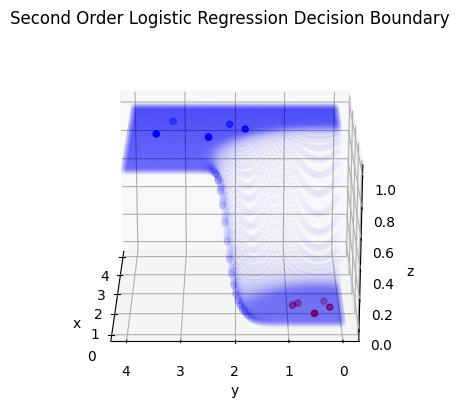

In [ ]:
#Plot the 3D surface boundary
fig = plt.figure()
plot3d = plt.axes(projection='3d')

plot3d.scatter3D(X, Y, Z, c='b', alpha=0.02)
plot3d.set_xlabel('x')
plot3d.set_ylabel('y')
plot3d.set_zlabel('z')
plt.title('Second Order Logistic Regression Decision Boundary')

zdata = [0.0, 0.0, 0.0, 0.0, 0.0]
xdata = [0.5, 0.8, 0.9, 1.0, 1.1]
ydata = [0.5, 0.2, 0.9, 0.8, 0.3]
plot3d.scatter3D(xdata, ydata, zdata, c='r')

zdata = [1.0, 1.0, 1.0, 1.0, 1.0]
xdata = [2.0, 2.2, 2.5, 2.8, 3.0]
ydata = [2.5, 3.5, 1.8, 2.1, 3.2]
plot3d.scatter3D(xdata, ydata, zdata, c='b')

plot3d.view_init(20, 180, 0)

**How do you compare these two classifiers?**

After computing the optimal weights using steepest decent and plotting both the first order and second order decision boundaries, there is a clear change in how the model fits to the data. First off, both the first and second order classifiers were able to perfectly separate the datapoints from the two sets. However, in the first order logistic regression classifier, the model was very generalized in how it split the data. The first order classifier lacked the ability to shape around the data and was linear when it had the sharp boundary from the 0 class to the 1 class. On the other hand, the second order classifier introduced the ability for the model to introduce a 2-dimensional curve around the data for the boundary on when it transitioned from the 0 to 1 class. This gave it the ability to better fit the circular cluster of datapoints, making it a seemingly better classifier. However, more test datapoints would be necessary to see if the trend that the second order classifier was able to capture is helpful or just a form of overfitting.
